In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets

import seaborn as sns


### Principal Component Analysis

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

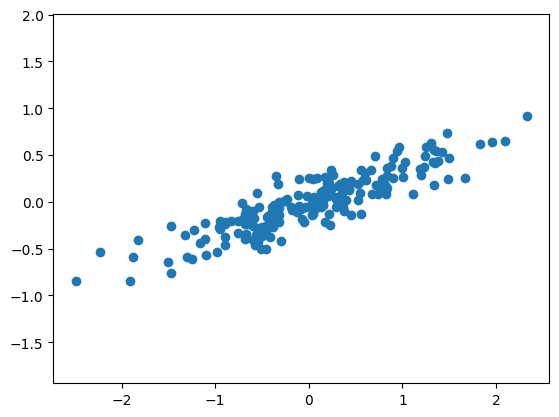

In [30]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [32]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

components: Principal axes in feature space, representing the directions of maximum variance in the data.

explained_variance: the amount of variance explained by each of the selected components.

In [36]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


visualzie the first component: the dimension (direction) with the largest variance out of the overall variance

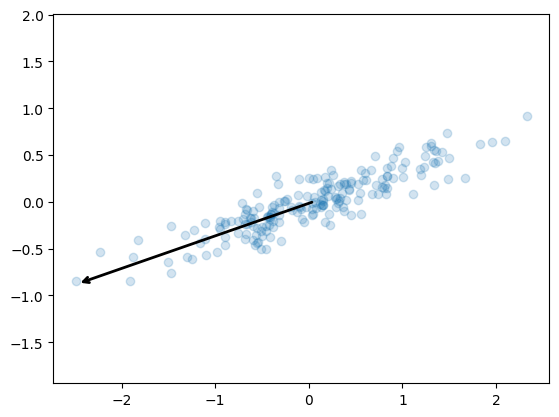

In [39]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    break
plt.axis('equal');

visualzie all components

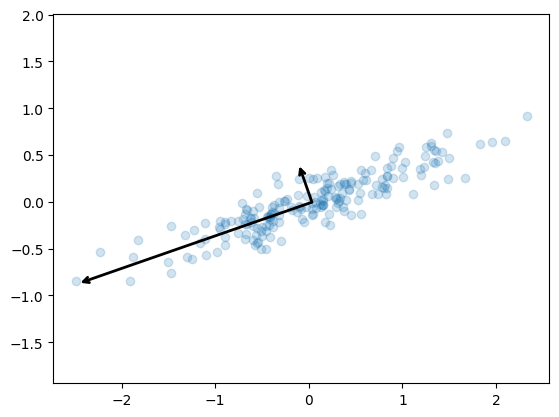

In [40]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### Principal Component Analysis for Data Visualization

Load iris data

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape)

(150, 4)


Use first two features and plot data points in 2D feature maps

Lost the info of the last 2 features

<AxesSubplot: >

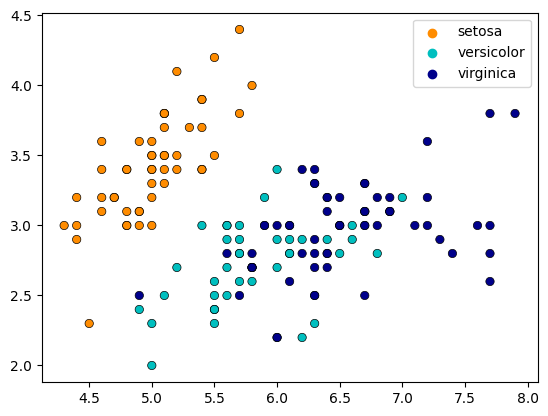

In [9]:
cmap_bold = ["darkorange", "c", "darkblue"]
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)

Use PCA to reduce the feature dimension to 2, and visualize the data points

<AxesSubplot: >

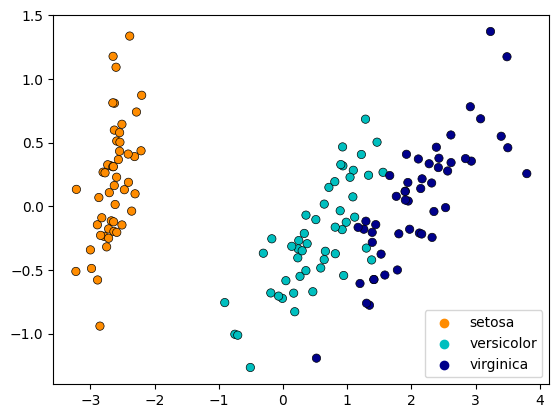

In [8]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

cmap_bold = ["darkorange", "c", "darkblue"]
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)